# Project Name - Liver Patient Prediction

# Problem Statement: Create a predictive model with implementation of different classifiers on liver patient diseases dataset to predict liver diseases.


## Domain Analysis

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

This data set contains 416 liver patient records and 167 non liver patient records. The "Target" column is a Selector label used to divide groups into liver patients (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.
Any patient whose age exceeded 89 is listed as being of age "90".


* Age of patients:Age of the patients.
* Gender of patients:gender of patients.
* Total Biliru bin:Bilirubin is an orange-yellow pigment that occurs normally when part of your red blood cells break down.
  A bilirubin test measures the amount of bilirubin in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease.
* Direct Bili rubin:Bilirubin attached by the liver to glucuronic acid, a glucose-derived acid, is called direct, or conjugated, bilirubin. Bilirubin not attached to glucuronic acid is called indirect
* Alkaline Phosp hotase:Alkaline phosphatase (ALP) is an enzyme in a person's blood that helps break down proteins.Using an ALP test, it is possible to measure how much of this enzyme is circulating in a person’s blood.
* Alamine Aminotran sferase:Alanine aminotransferase (ALT) is an enzyme found primarily in the liver and kidney.   ALT is increased with liver damage and is used to screen for and/or monitor liver disease. 
* Aspartate Aminotra nsferase:AST (aspartate aminotransferase) is an enzyme that is found mostly in the liver, but also in muscles. When your liver is damaged, it releases AST into your bloodstream. An AST blood test measures the amount of AST in your blood. The test can help your health care provider diagnose liver damage or disease.
* Total  Protiens:Albumin and globulin are two types of protein in your body. The total protein test measures the total amount albumin and globulin in your body.
 
* Albumin:Albumin is the most abundant protein in human plasma, making up about half of its total protein content. It helps keep fluid from leaking out of blood vessels into other tissues. Albumin also carries hormones, vitamins, and enzymes throughout the body
* Albumin and Glo Tbulin Ratio:he albumin-to-globulin (A/G) ratio is a measure of the amount of albumin proteins in the blood compared to globulins. A normal A/G ratio is usually between 1.0 and 2.0, and a ratio below 1 or above 2.5 is considered abnormal

Dataset: field used to split the data into two sets (patient with liver disease(1), or no disease(2)).

# Importing Libraries

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [3]:
# Reading Dataset:
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
data

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
features = ["Age", "Gender", "Total Bilirubin", "Direct Bilirubin", "Alkphos Alkaline Phosphotase", "Sgpt Alamine Aminotransferase", "Sgot Aspartate Aminotransferase", "Total Protiens", "Albumin", "Albumin-Globulin Ratio", "Selector"]
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv', names = features)
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Basic Checks

In [5]:
data.shape

(583, 11)

In [6]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
data.tail()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [8]:
data.dtypes

Age                                  int64
Gender                              object
Total Bilirubin                    float64
Direct Bilirubin                   float64
Alkphos Alkaline Phosphotase         int64
Sgpt Alamine Aminotransferase        int64
Sgot Aspartate Aminotransferase      int64
Total Protiens                     float64
Albumin                            float64
Albumin-Globulin Ratio             float64
Selector                             int64
dtype: object

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkphos Alkaline Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Sgpt Alamine Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Sgot Aspartate Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin-Globulin Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Selector,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [10]:
data.describe(include='O')

,Gender
count,583
unique,2
top,Male
freq,441


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              583 non-null    int64  
 1   Gender                           583 non-null    object 
 2   Total Bilirubin                  583 non-null    float64
 3   Direct Bilirubin                 583 non-null    float64
 4   Alkphos Alkaline Phosphotase     583 non-null    int64  
 5   Sgpt Alamine Aminotransferase    583 non-null    int64  
 6   Sgot Aspartate Aminotransferase  583 non-null    int64  
 7   Total Protiens                   583 non-null    float64
 8   Albumin                          583 non-null    float64
 9   Albumin-Globulin Ratio           579 non-null    float64
 10  Selector                         583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [12]:
data.columns# Getting all columns form the dataset

Index(['Age', 'Gender', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
       'Sgot Aspartate Aminotransferase', 'Total Protiens', 'Albumin',
       'Albumin-Globulin Ratio', 'Selector'],
      dtype='object')

In [13]:
pd.set_option('display.max_rows',None)# Getting maximum rows form the dataset

In [14]:
data

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [15]:
data.Gender.value_counts()

Gender
Male      441
Female    142
Name: count, dtype: int64

In [16]:
data.Selector.value_counts()

Selector
1    416
2    167
Name: count, dtype: int64

In [17]:
# Dataset Duplicate Value Count
duplicated_values_count = len(data[data.duplicated()])
duplicated_values_count

13

**Insights** Duplicate rows found

In [18]:
# Remove duplicates from the original DataFrame
data.drop_duplicates(inplace=True)

In [19]:
# Checking whether duplicate values removed
duplicated_values_count = len(data[data.duplicated()])
duplicated_values_count

0

In [20]:
data.isnull().sum()

Age                                0
Gender                             0
Total Bilirubin                    0
Direct Bilirubin                   0
Alkphos Alkaline Phosphotase       0
Sgpt Alamine Aminotransferase      0
Sgot Aspartate Aminotransferase    0
Total Protiens                     0
Albumin                            0
Albumin-Globulin Ratio             4
Selector                           0
dtype: int64

**Insights** We have missing values in Albumin-Globulin_Ratio

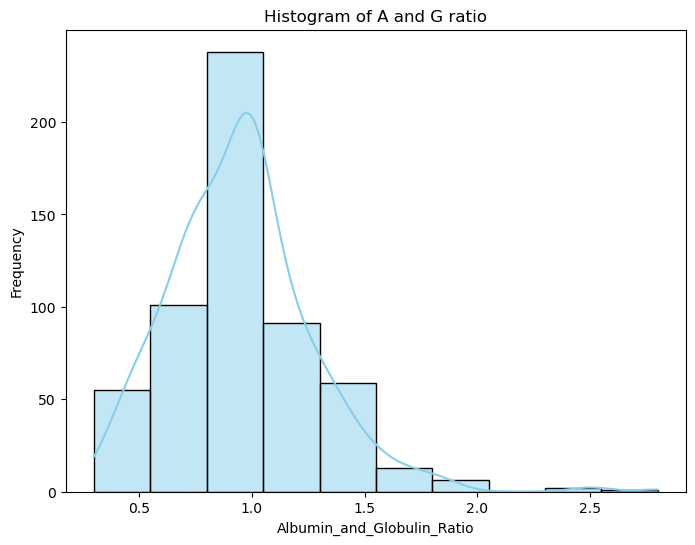

In [21]:
# Univariat analysis to fill the missing values
# Set up the subplot
plt.figure(figsize=(8, 6), facecolor='white')

# Create a histogram for the 'Age' column
sns.histplot(data['Albumin-Globulin Ratio'], kde=True, bins=10, color='skyblue')
plt.title("Histogram of A and G ratio")
plt.xlabel("Albumin_and_Globulin_Ratio")
plt.ylabel("Frequency")

# Show the plot
plt.show()

**Insights** As per the above chart, we will fill Nan values with Median

In [22]:
# Filling NaN Values of "Albumin_and_Globulin_Ratio" feature with Median :
data['Albumin-Globulin Ratio'] = data['Albumin-Globulin Ratio'].fillna(data['Albumin-Globulin Ratio'].median())

In [23]:
data.isnull().sum()

Age                                0
Gender                             0
Total Bilirubin                    0
Direct Bilirubin                   0
Alkphos Alkaline Phosphotase       0
Sgpt Alamine Aminotransferase      0
Sgot Aspartate Aminotransferase    0
Total Protiens                     0
Albumin                            0
Albumin-Globulin Ratio             0
Selector                           0
dtype: int64

In [24]:
# fetch numerical columns
num_col=data.select_dtypes(include=['int64','float64']).columns
num_col

Index(['Age', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
       'Sgot Aspartate Aminotransferase', 'Total Protiens', 'Albumin',
       'Albumin-Globulin Ratio', 'Selector'],
      dtype='object')

In [25]:
# fetch categorical columns
cat_col=data.select_dtypes(include=['object'])
cat_col.columns

Index(['Gender'], dtype='object')

# Label Encoding

In [26]:
#Data types
data.dtypes

Age                                  int64
Gender                              object
Total Bilirubin                    float64
Direct Bilirubin                   float64
Alkphos Alkaline Phosphotase         int64
Sgpt Alamine Aminotransferase        int64
Sgot Aspartate Aminotransferase      int64
Total Protiens                     float64
Albumin                            float64
Albumin-Globulin Ratio             float64
Selector                             int64
dtype: object

**Insights** Gender feature has object datatype, we need to convert into Numerical

In [27]:
# Label Encoding
data['Gender'] = np.where(data['Gender']=='Male', 1,0)

In [28]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# EDA

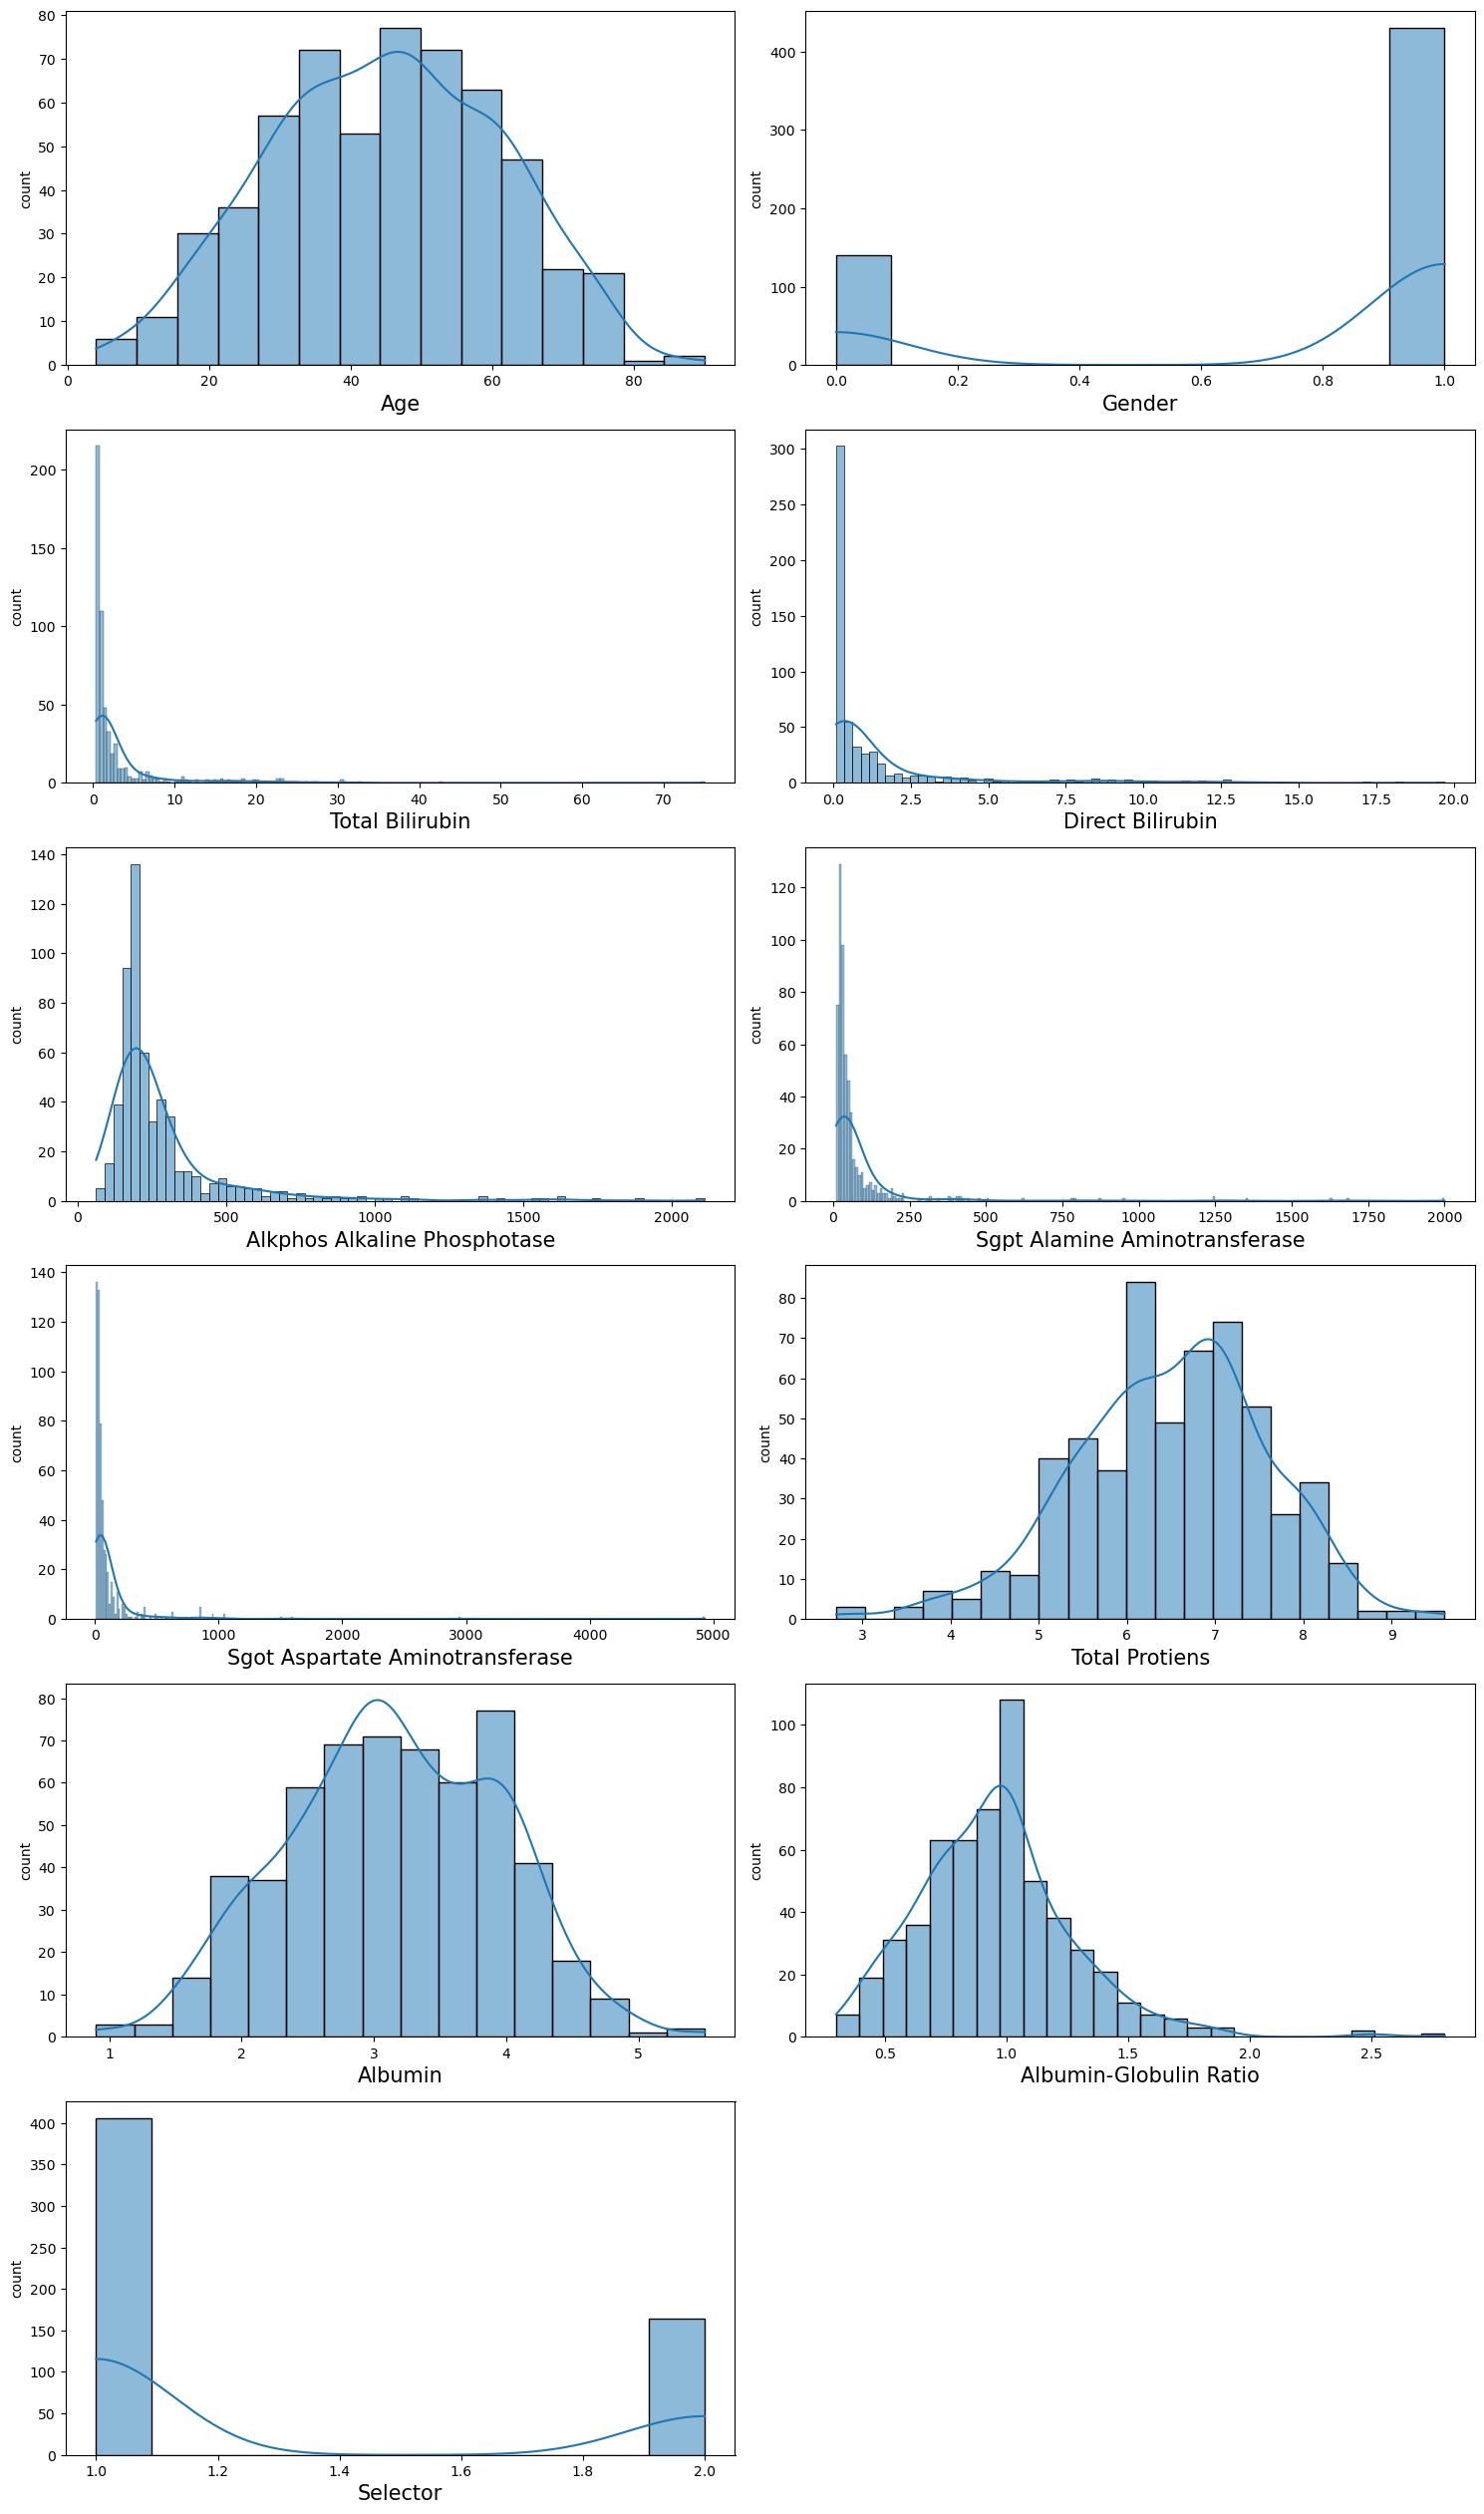

In [29]:
#Univariate Analysis
plt.figure(figsize=(15,50))
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(12,2,plotnumber)
        count=sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=15)
        plt.ylabel("count")
    plotnumber+=1
plt.tight_layout()

**Insights**
*  Age, Gender, Total Protiens, Albumin and Albumin Globulin ratio and Selectors columns data looks fine.
* Extreme outliers found in Total Bilirubin, Direct Bilirub, Alkphos Alkaline Phosphotase, Sgpt Alamine Aminotransferase and Sgot Aspartate Aminotransferase columns.
* Compare to Female patient, Male patient are more.
* Maximum dataset lies bteween age group of 20 to 60.

<Axes: xlabel='Age', ylabel='Total Bilirubin'>

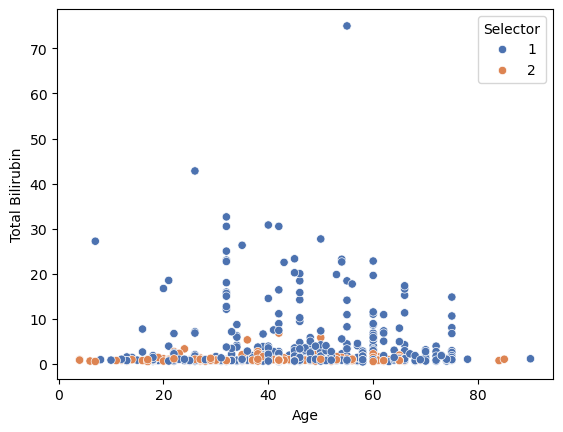

In [30]:
#Bivariate analysis
sns.scatterplot(x=data['Age'],y=data['Total Bilirubin'],hue=data['Selector'],palette='deep')

**Insights**
* Maximum data lies bttween age group of 20 to 60.

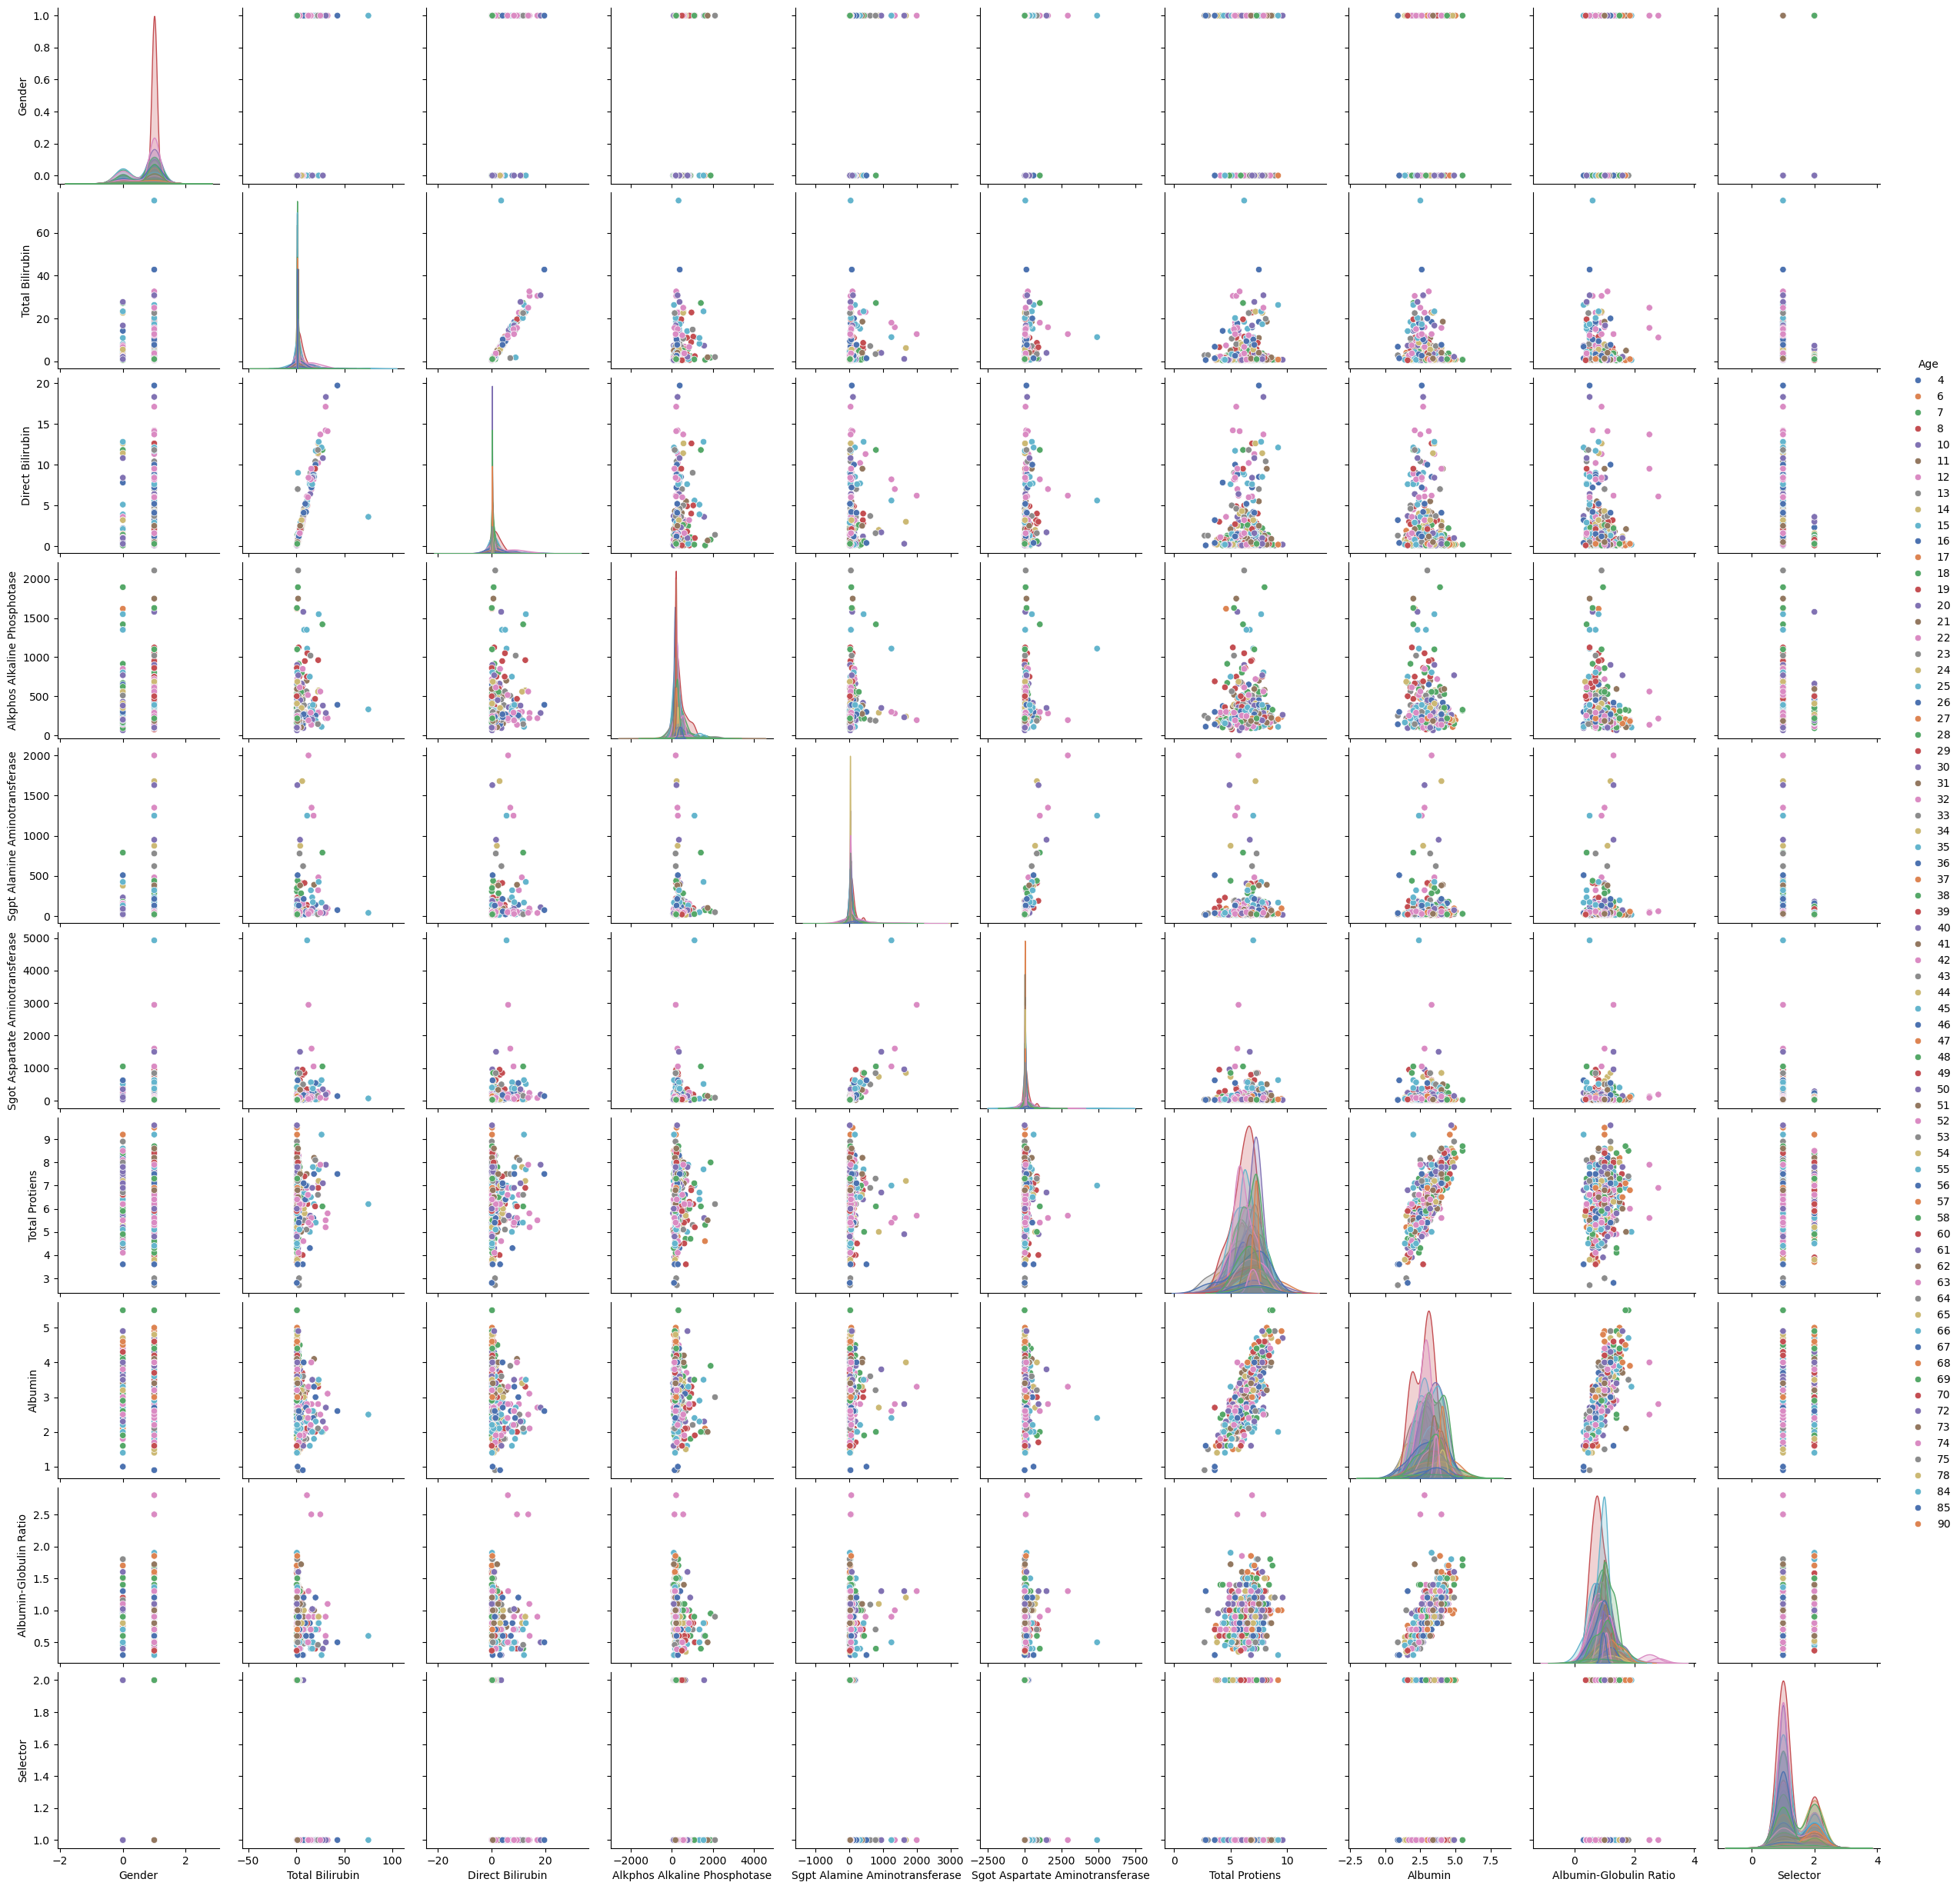

In [31]:
# Multivariate analysis
sns.pairplot(data,hue='Age',palette='deep')

# Preprocessing 

In [32]:
#Outliers

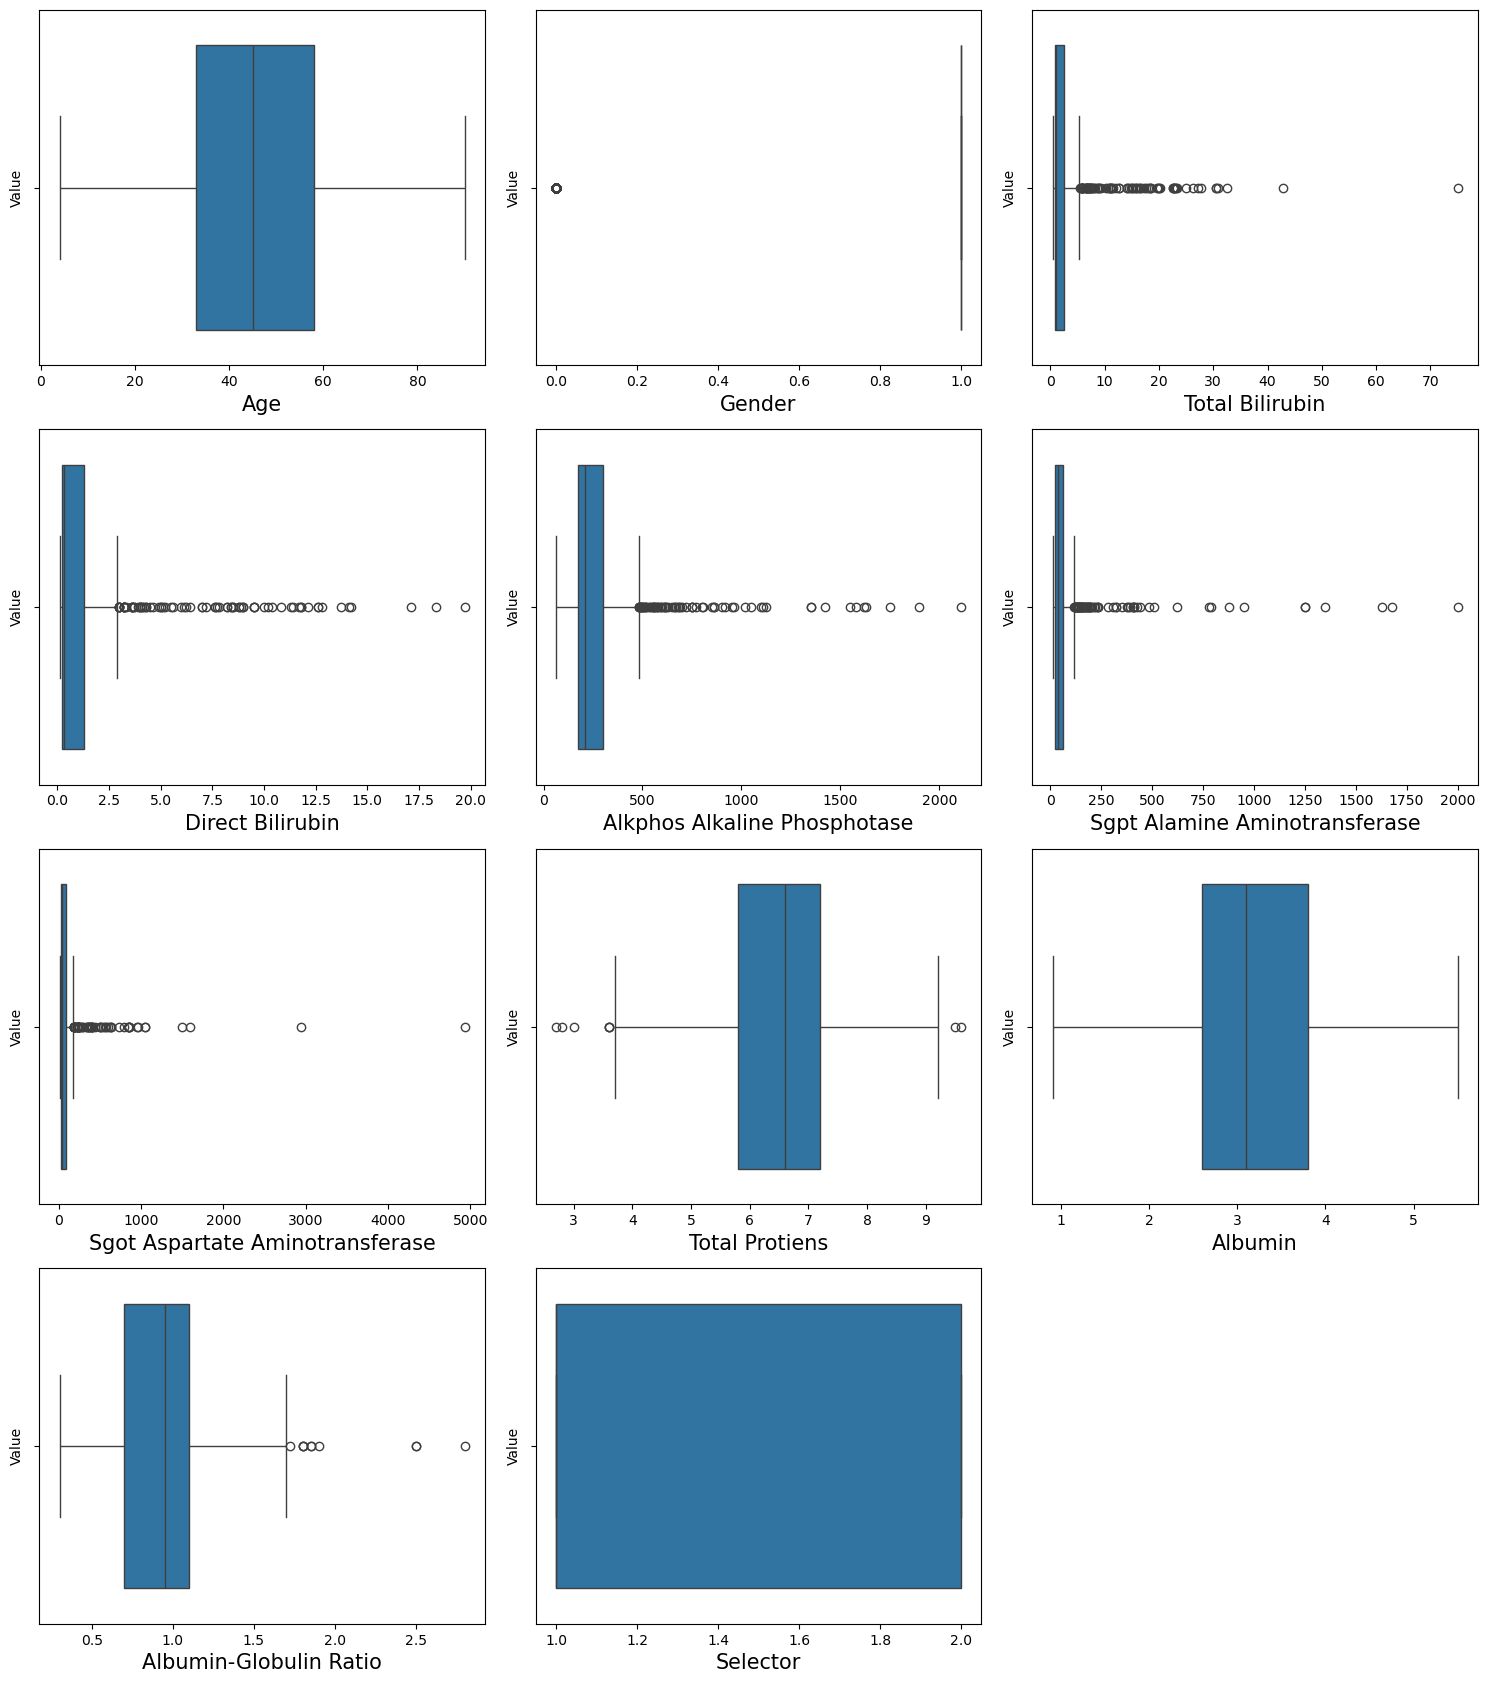

In [33]:
plt.figure(figsize=(15, 50))
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(12, 3, plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column, fontsize=15)
        plt.ylabel("Value")
    plotnumber += 1

plt.tight_layout()
plt.show()

In [34]:
# 'data' is our DataFrame
columns_to_process = ['Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
                       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
                       'Total Protiens','Albumin-Globulin Ratio']

for column in columns_to_process:
    # Calculate Interquantile range
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)

    # Calculate lower and upper bridges
    lower_quartile = data[column].quantile(0.25) - (1.5 * IQR)
    
    upper_quartile = data[column].quantile(0.75) + (1.5 * IQR)



    # Replace values less than lower quartile with lower quartile value
    data.loc[data[column] <= lower_quartile, column] = lower_quartile
    
    # Replace values greater than upper quartile with upper quartile value
    data.loc[data[column] >= upper_quartile, column] = upper_quartile

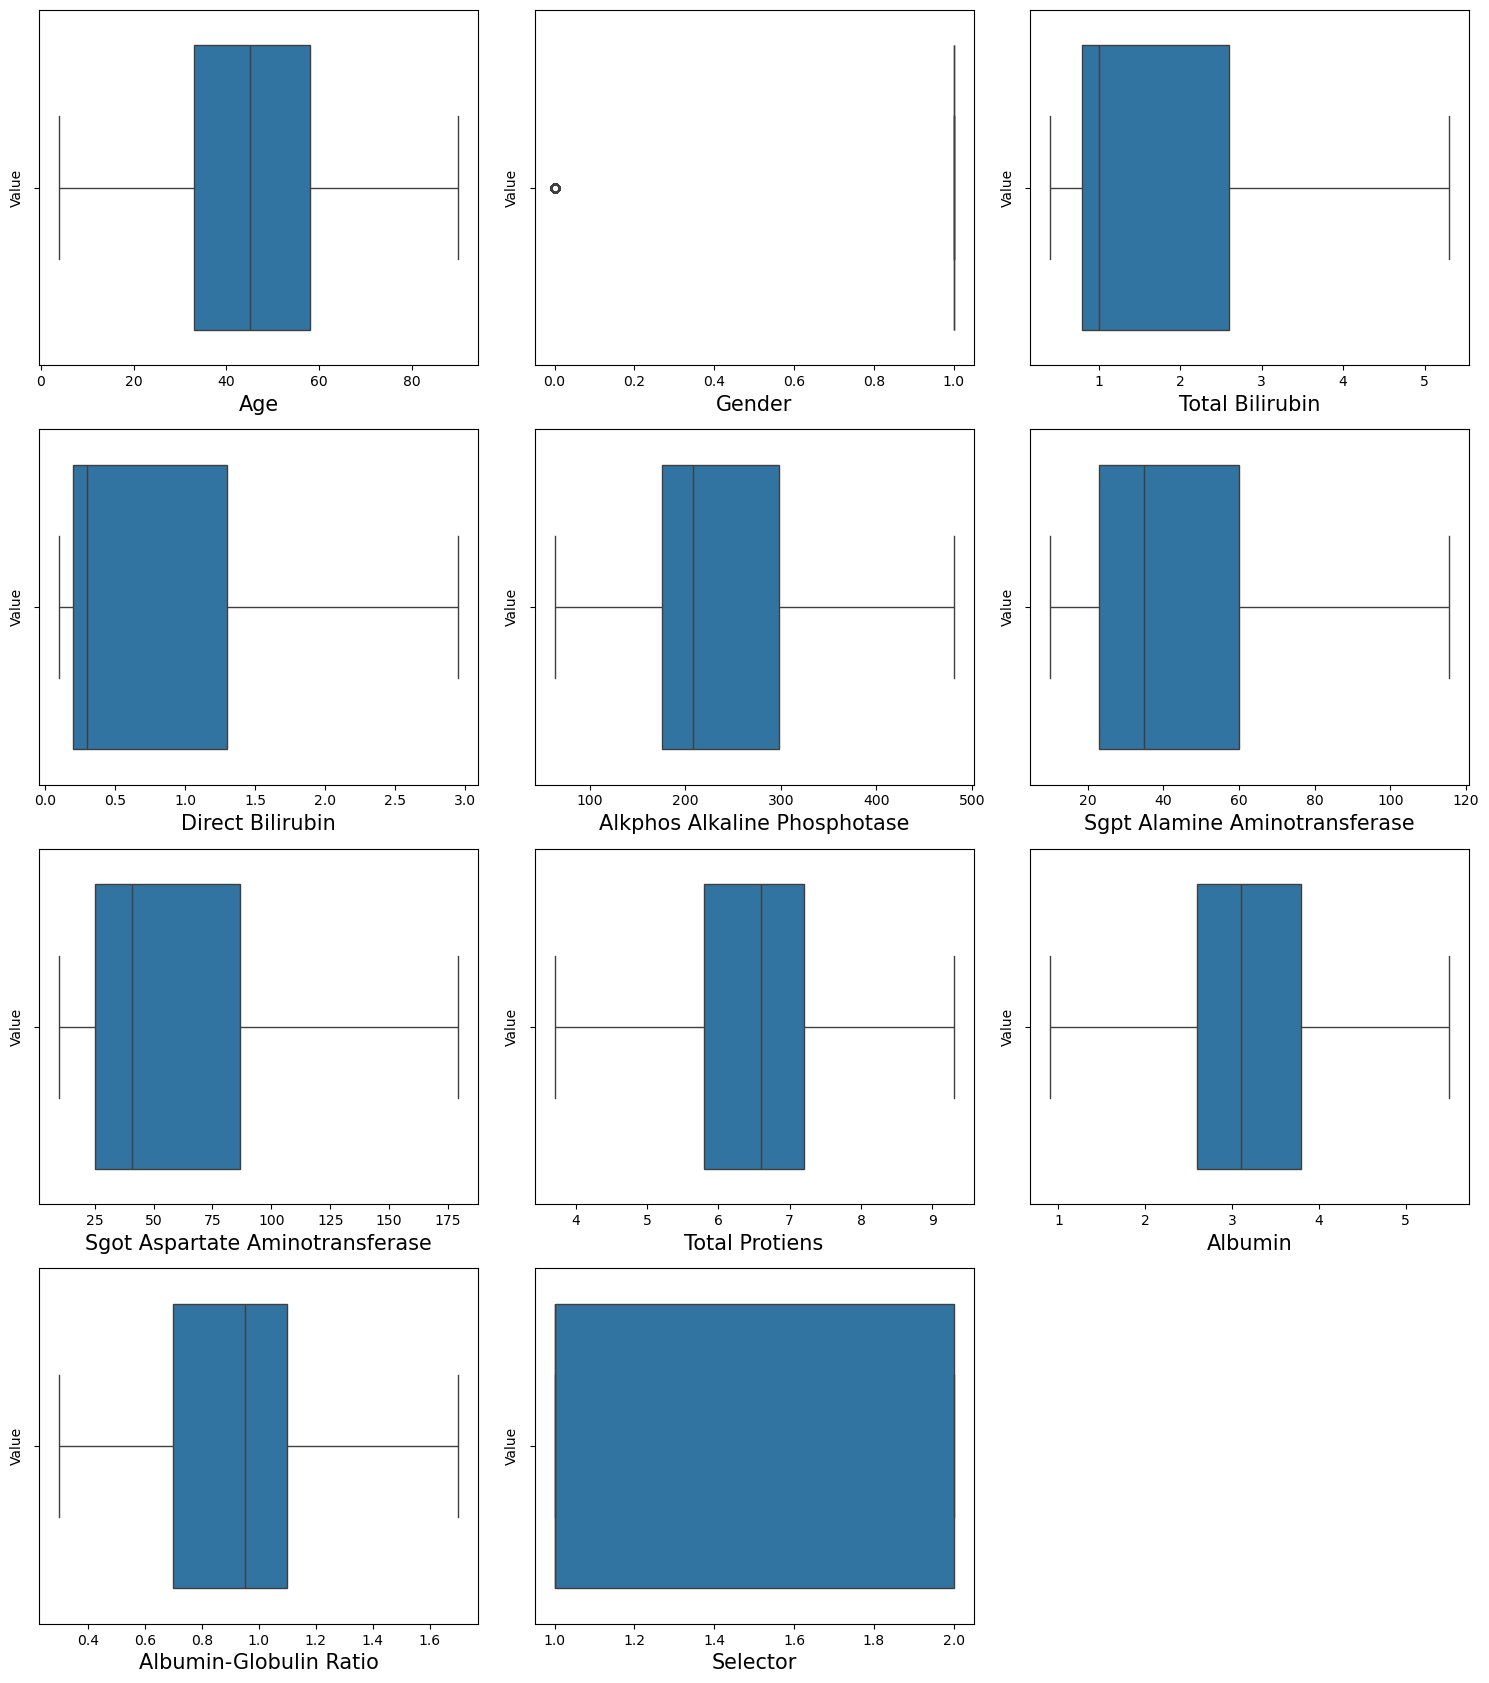

In [35]:
plt.figure(figsize=(15, 50))
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(12, 3, plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column, fontsize=15)
        plt.ylabel("Value")
    plotnumber += 1

plt.tight_layout()
plt.show()

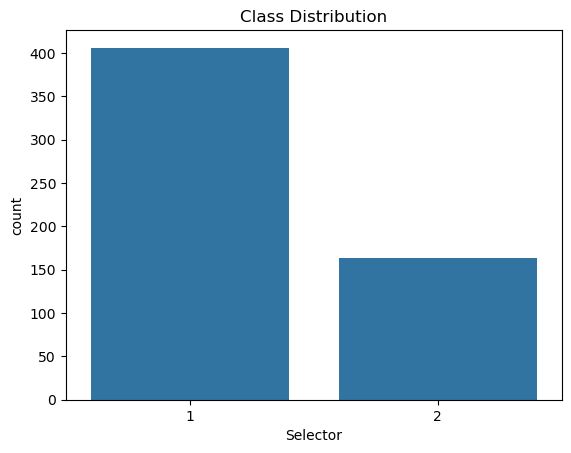

In [36]:
#'data' is your DataFrame
sns.countplot(x='Selector', data=data)
plt.title('Class Distribution')
plt.show()

**Insights** It is a imbalanced dataset, we will use SMOTE to balance it

# Smote

In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter# importing counter to check count of each label

X = data.drop('Selector', axis=1)  # Features
y = data['Selector']  # Target

smote=SMOTE(random_state=40) 
X_smote,y_smote=smote.fit_resample(X,y)
y.value_counts()

Selector
1    406
2    164
Name: count, dtype: int64

In [38]:
print("Actual",Counter(y))# checking count for each class
print("After smote",Counter(y_smote))# checking count after sampling for  each class

Actual Counter({1: 406, 2: 164})
After smote Counter({1: 406, 2: 406})


In [39]:
data

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
0,65,0,0.7,0.10,187,16.0,18.000,6.8,3.3,0.90,1
1,62,1,5.3,2.95,481,64.0,100.000,7.5,3.2,0.74,1
2,62,1,5.3,2.95,481,60.0,68.000,7.0,3.3,0.89,1
3,58,1,1.0,0.40,182,14.0,20.000,6.8,3.4,1.00,1
4,72,1,3.9,2.00,195,27.0,59.000,7.3,2.4,0.40,1
5,46,1,1.8,0.70,208,19.0,14.000,7.6,4.4,1.30,1
6,26,0,0.9,0.20,154,16.0,12.000,7.0,3.5,1.00,1
7,29,0,0.9,0.30,202,14.0,11.000,6.7,3.6,1.10,1
8,17,1,0.9,0.30,202,22.0,19.000,7.4,4.1,1.20,2
9,55,1,0.7,0.20,290,53.0,58.000,6.8,3.4,1.00,1


# Scaling

In [40]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['Total Bilirubin', 'Direct Bilirubin','Alkphos Alkaline Phosphotase','Sgpt Alamine Aminotransferase','Sgot Aspartate Aminotransferase', 
      'Total Protiens', 'Albumin','Albumin-Globulin Ratio']]=scale.fit_transform(data[['Total Bilirubin', 'Direct Bilirubin',
      'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase','Sgot Aspartate Aminotransferase', 'Total Protiens', 'Albumin',
       'Albumin-Globulin Ratio']])

In [41]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
0,65,0,0.061224,0.000000,0.296651,0.056872,0.047232,0.553571,0.521739,0.428571,1
1,62,1,1.000000,1.000000,1.000000,0.511848,0.531365,0.678571,0.500000,0.314286,1
2,62,1,1.000000,1.000000,1.000000,0.473934,0.342435,0.589286,0.521739,0.421429,1
3,58,1,0.122449,0.105263,0.284689,0.037915,0.059041,0.553571,0.543478,0.500000,1
4,72,1,0.714286,0.666667,0.315789,0.161137,0.289299,0.642857,0.326087,0.071429,1


# Feature Selection

<Axes: >

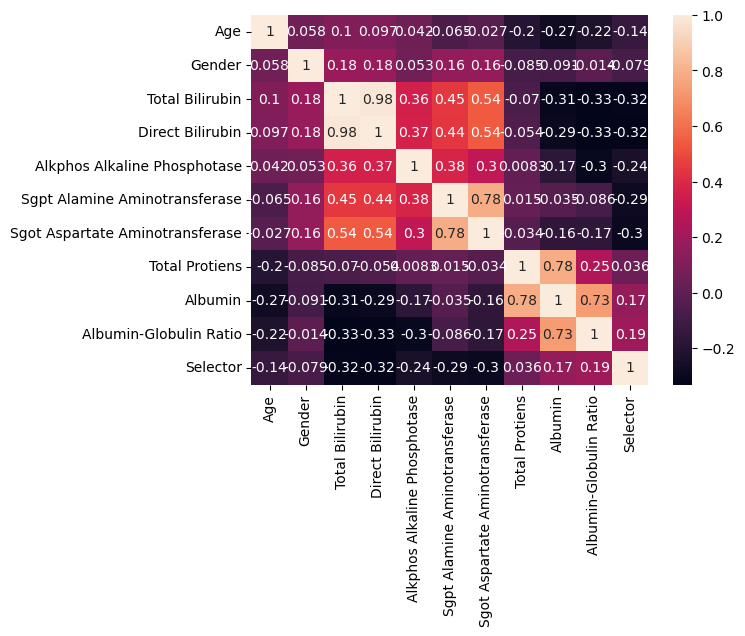

In [42]:
## We will check correlation
sns.heatmap(data.corr(),annot=True)

**Insights**
* There are few predictors have high co-relation, however the percentage is not above 90% so we will not remove any features.

# Model 1 - Logistic Regression 

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'data' is your DataFrame with scaled features and target column
X = data.drop('Selector', axis=1)  # Features
y = data['Selector']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the training set
logistic_train_predictions = logistic_model.predict(X_train)

# Evaluate the Logistic Regression model on training set
train_accuracy = accuracy_score(y_train, logistic_train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
logistic_test_predictions = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model on test set
test_accuracy = accuracy_score(y_test, logistic_test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print other metrics such as classification report or confusion matrix for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, logistic_test_predictions))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, logistic_test_predictions))



Training Accuracy: 0.72
Test Accuracy: 0.76

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.78      0.94      0.86        85
           2       0.58      0.24      0.34        29

    accuracy                           0.76       114
   macro avg       0.68      0.59      0.60       114
weighted avg       0.73      0.76      0.72       114


Confusion Matrix (Test Set):
[[80  5]
 [22  7]]


# Model 2 - SVC

In [44]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly', etc.)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the training set
svm_train_predictions = svm_model.predict(X_train)

# Evaluate the SVM model on training set
train_accuracy = accuracy_score(y_train, svm_train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
svm_test_predictions = svm_model.predict(X_test)

# Evaluate the SVM model on test set
test_accuracy = accuracy_score(y_test, svm_test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print other metrics such as classification report or confusion matrix for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, svm_test_predictions))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, svm_test_predictions))

Training Accuracy: 0.70
Test Accuracy: 0.75

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.75      1.00      0.85        85
           2       0.00      0.00      0.00        29

    accuracy                           0.75       114
   macro avg       0.37      0.50      0.43       114
weighted avg       0.56      0.75      0.64       114


Confusion Matrix (Test Set):
[[85  0]
 [29  0]]


# Model 3 - SVM with Hyperparameter tuned

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# Define the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Make predictions on the training set
svm_train_predictions = best_svm_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, svm_train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
svm_test_predictions = best_svm_model.predict(X_test)

# Evaluate the SVM model on the test set
test_accuracy = accuracy_score(y_test, svm_test_predictions)

# Print the best parameters and performance metrics
print("Best Parameters:", best_params)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print other metrics such as classification report or confusion matrix
print("\nClassification Report (Test Set):")
print(classification_report(y_test, svm_test_predictions))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, svm_test_predictions))


Training Accuracy: 0.70
Best Parameters: {'C': 0.1, 'gamma': 'scale'}
Test Accuracy: 0.75

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.75      1.00      0.85        85
           2       0.00      0.00      0.00        29

    accuracy                           0.75       114
   macro avg       0.37      0.50      0.43       114
weighted avg       0.56      0.75      0.64       114


Confusion Matrix (Test Set):
[[85  0]
 [29  0]]


# Model 4 - Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the training set
random_forest_train_predictions = random_forest_model.predict(X_train)

# Evaluate the Random Forest model on training set
train_accuracy = accuracy_score(y_train, random_forest_train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
random_forest_test_predictions = random_forest_model.predict(X_test)

# Evaluate the Random Forest model on test set
test_accuracy = accuracy_score(y_test, random_forest_test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print other metrics such as classification report or confusion matrix for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, random_forest_test_predictions))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, random_forest_test_predictions))


Training Accuracy: 1.00
Test Accuracy: 0.75

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.81      0.87      0.84        85
           2       0.52      0.41      0.46        29

    accuracy                           0.75       114
   macro avg       0.67      0.64      0.65       114
weighted avg       0.74      0.75      0.74       114


Confusion Matrix (Test Set):
[[74 11]
 [17 12]]


# Model 5 - Random Forest Hyper parameter tuned

In [47]:
from sklearn.model_selection import GridSearchCV

# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are already defined

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model
best_random_forest_model = grid_search.best_estimator_

# Make predictions on the training set
random_forest_train_predictions = best_random_forest_model.predict(X_train)

# Evaluate the Random Forest model on training set
train_accuracy = accuracy_score(y_train, random_forest_train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
random_forest_test_predictions = best_random_forest_model.predict(X_test)

# Evaluate the Random Forest model on test set
test_accuracy = accuracy_score(y_test, random_forest_test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Print other metrics such as classification report or confusion matrix for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, random_forest_test_predictions))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, random_forest_test_predictions))

Training Accuracy: 0.98
Test Accuracy: 0.79
Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.83      0.91      0.87        85
           2       0.62      0.45      0.52        29

    accuracy                           0.79       114
   macro avg       0.72      0.68      0.69       114
weighted avg       0.77      0.79      0.78       114


Confusion Matrix (Test Set):
[[77  8]
 [16 13]]


# Model 6 - GradientBoostingClassifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Train the model on the training set
gb_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_gb = gb_classifier.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train_gb)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Evaluate the model on the test set
print("Classification Report (Test Set):\n", classification_report(y_test, y_pred_gb))

Training Accuracy: 0.96
Test Accuracy: 0.69
Classification Report (Test Set):
               precision    recall  f1-score   support

           1       0.77      0.84      0.80        85
           2       0.36      0.28      0.31        29

    accuracy                           0.69       114
   macro avg       0.57      0.56      0.56       114
weighted avg       0.67      0.69      0.68       114



# Model 7 - XGBClassifer Hyperparameter tuned

In [49]:
from xgboost import XGBClassifier

# Assuming X and y are your feature matrix and target variable
# Make sure to adjust y so that class labels start from 0
y = y - 1  # Assuming original labels are 1 and 2, convert them to 0 and 1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Make predictions on the training set
xgb_train_predictions = best_xgb_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, xgb_train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
xgb_test_predictions = best_xgb_model.predict(X_test)

# Evaluate the XGBoost model on the test set
test_accuracy = accuracy_score(y_test, xgb_test_predictions)

# Print the best parameters and performance metrics
print("Best Parameters:", best_params)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print other metrics such as classification report or confusion matrix
print("\nClassification Report (Test Set):")
print(classification_report(y_test, xgb_test_predictions))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, xgb_test_predictions))

Training Accuracy: 0.70
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Test Accuracy: 0.75

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.75      1.00      0.85        85
           1       0.00      0.00      0.00        29

    accuracy                           0.75       114
   macro avg       0.37      0.50      0.43       114
weighted avg       0.56      0.75      0.64       114


Confusion Matrix (Test Set):
[[85  0]
 [29  0]]


# Model Comparsion report

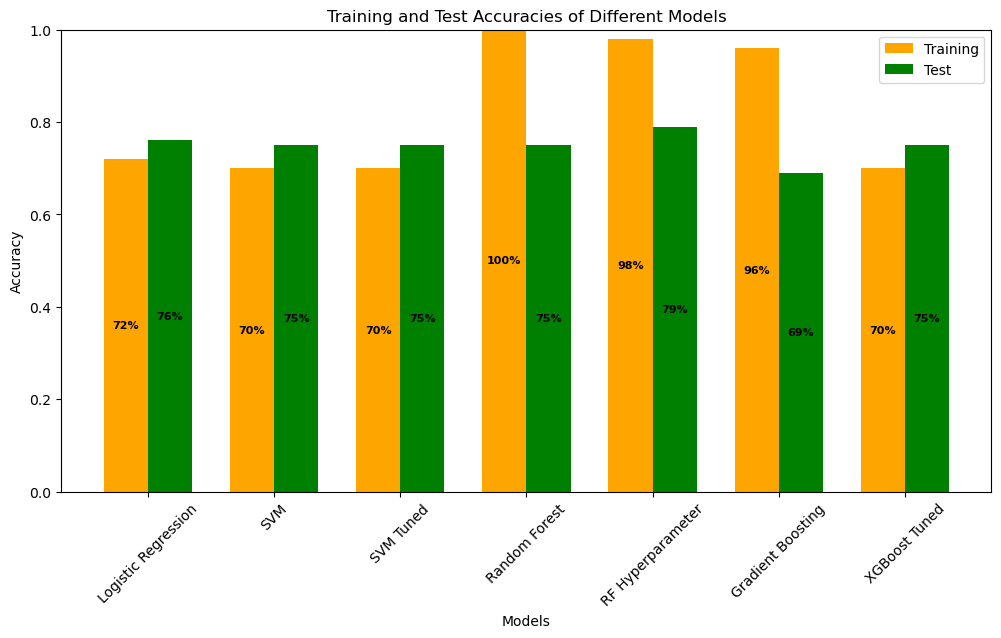

In [50]:
models = ['Logistic Regression', 'SVM', 'SVM Tuned', 'Random Forest','RF Hyperparameter', 'Gradient Boosting', 'XGBoost Tuned']
training_accuracies = [0.72,0.70,0.70,1.0,0.98,0.96,0.70]
test_accuracies = [0.76,0.75,0.75,0.75,0.79,0.69,0.75]

bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(index - bar_width/2, training_accuracies, bar_width, label='Training', color='orange')
bar2 = ax.bar(index + bar_width/2, test_accuracies, bar_width, label='Test', color='green')

ax.set_title('Training and Test Accuracies of Different Models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)  # Set the y-axis limit to the range of accuracy (0 to 1)
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Add percentage values inside the bars
for bar, train_acc, test_acc in zip(bar1, training_accuracies, test_accuracies):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{train_acc*100:.0f}%', color='black',
            ha='center', va='center', fontsize=8, fontweight='bold')
    
for bar, test_acc in zip(bar2, test_accuracies):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{test_acc*100:.0f}%', color='black',
            ha='center', va='center', fontsize=8, fontweight='bold')

plt.show()


**Insights**
* Logistic Regression show Traning accuracy of 72% and testing accuracy of 76%.
* SVM show Traning accuracy of 70% and testing accuracy of 75%.
* SVM Tuned show Traning accuracy of 70% and testing accuracy of 75%.
* Random Forest show Traning accuracy of 100% and testing accuracy of 75%.
* Random Forest Hyperparameter show Traning accuracy of 98% and testing accuracy of 79%.
* Gradient Boosting show Traning accuracy of 96% and testing accuracy of 69%.
* XG Boosting show Traning accuracy of 70% and testing accuracy of 75%.

# Conclusion

* **Random Forest with Hyperparameter-tuned** performs good with the dataset.
* Random Forest with Hyperparametet-tuned a noteworthy **98%** training accuracy and an impressive **79%** accuracy on the test set, the model excels good as compare to other models.
* XGBoost Turned out be less accurate compare to other models.

# **Report on Challenges faced**

# Challenges Faced:

**Missing Values:** One of the challenge encountered was handling missing values within the dataset. Albumin-Globulin Ratio column had missing values which needed to be addressed before training the model. We use techniques such as median imputation for numerical column to handle missing values effectively.

**Feature Engineering:** This dataset contains one categorical(Gender)feature and few Numerical Features. We have to convert the categorical(Gender) column to  Numerical column.

**Preprocessing:** This Dataset contains extreme outliers. Outliers found in Several columns, which are 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase','Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase','Total Protiens','Albumin-Globulin Ratio'.

**Imbalanced Data:** This dataset exhibited class imbalance.To face this challenge we have use Smote for balancing the class feature.

**Model Selection:** Choosing the most suitable machine learning algorithm for the prediction task was another challenge. We experimented with various algorithms including logistic regression, SVM, SVM Hyperparameter Tuned, Random Forest, RandomForest Hyperparameter, Gradient Boosting, XGBoost Hyperparameter Tuned.

# Techniques Used:

**Data Preprocessing:** We performed comprehensive data preprocessing steps including handling missing values, feature scaling, encoding categorical variables, and feature selection to prepare the dataset for model training.

**Ensemble Learning:** Ensemble learning techniques such as Random Forest, Gradient Boosting and XGBoost were employed due to their ability to handle complex relationships in the data and produce predictions. These models combine multiple weak learners to improve overall performance and generalize well to unseen data. Random Forest with Hyperparameter-tuned performs good with the dataset.XGBoost Turned out be less accurate compare to other models.